Devang Patel Data Science Project

In [80]:
#import needed modules
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('heart.csv')

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [84]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
continuous_features = ['age', 'trestbps','chol', 'thalach', 'oldpeak', 'ca']

In [85]:
# categorical_qual = df[categorical_features]
# categorical_qual = categorical_qual.describe()
# categorical_qual = categorical_qual.transpose()
# categorical_qual['% Missing'] = 0.0
# categorical_qual

In [86]:
# data qualtiy report table for categorical features
categorical_qual = pd.DataFrame(columns = ['Feature', 'Count', '% Missing', 'Mode', 'Mode Frequency', 'Mode %', '2nd Mode', '2nd Mode Frequency', '2nd Mode %'])
categorical_qual['Feature'] = categorical_features
categorical_qual['Count'] = len(df)
categorical_qual['% Missing'] = 0

card = []
mode = []
mode_freq = []
mode_2nd = []
mode_freq_2nd = []


for item in categorical_features:
    card.append(df[item].nunique())
    mode.append(int(df[item].mode()))
    lst = df[item].value_counts()
    mode_2nd.append(lst.keys()[1])
    mode_freq.append(int(lst[0:1]))
    mode_freq_2nd.append(int(lst[1:2]))
    

lst = df['age'].value_counts()
print(lst[0:1])
categorical_qual['Mode'] = mode
categorical_qual['Mode Frequency'] = mode_freq
categorical_qual['Mode %'] = round((categorical_qual['Mode Frequency'] / categorical_qual['Count']) * 100, 1)
categorical_qual['2nd Mode'] = mode_2nd
categorical_qual['2nd Mode Frequency'] = mode_freq_2nd
categorical_qual['2nd Mode %'] = round((categorical_qual['2nd Mode Frequency'] / categorical_qual['Count']) * 100,1)


categorical_qual

58    19
Name: age, dtype: int64


,Feature,Count,% Missing,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %
0,sex,303,0,1,207,68.3,0,96,31.7
1,cp,303,0,0,143,47.2,2,87,28.7
2,fbs,303,0,0,258,85.1,1,45,14.9
3,restecg,303,0,1,152,50.2,0,147,48.5
4,exang,303,0,0,204,67.3,1,99,32.7
5,slope,303,0,2,142,46.9,1,140,46.2
6,thal,303,0,2,166,54.8,3,117,38.6


In [87]:
# data quality table for continuous features
continuous_qual = pd.DataFrame(columns = ['Feature', 'Count', '% Missing', 'Minimum', '1st Quartile', 'Mean', 'Median', '3rd Quartile', 'Maximum', 'Standard Deviation'])
continuous_qual['Feature'] = continuous_features
continuous_qual['Count'] = len(df)
continuous_qual['% Missing'] = 0



continuous_qual['Minimum'] = df[continuous_features].min().values
continuous_qual['1st Quartile'] = df[continuous_features].quantile(0.25).values
continuous_qual['3rd Quartile'] = df[continuous_features].quantile(0.75).values
continuous_qual['Mean'] = df[continuous_features].mean().values
continuous_qual['Median'] = df[continuous_features].median().values
continuous_qual['Maximum'] = df[continuous_features].max().values
continuous_qual['Standard Deviation'] = df[continuous_features].std().values
continuous_qual

,Feature,Count,% Missing,Minimum,1st Quartile,Mean,Median,3rd Quartile,Maximum,Standard Deviation
0,age,303,0,29.0,47.5,54.366337,55.0,61.0,77.0,9.082101
1,trestbps,303,0,94.0,120.0,131.623762,130.0,140.0,200.0,17.538143
2,chol,303,0,126.0,211.0,246.264026,240.0,274.5,564.0,51.830751
3,thalach,303,0,71.0,133.5,149.646865,153.0,166.0,202.0,22.905161
4,oldpeak,303,0,0.0,0.0,1.039604,0.8,1.6,6.2,1.161075
5,ca,303,0,0.0,0.0,0.729373,0.0,1.0,4.0,1.022606


In [88]:
count_with = len(df[df.target == 1])
count_without = len(df[df.target == 0])
total_num = len(df.target)
percent_with = (count_with / total_num) * 100
percent_without = (count_without / total_num) * 100
print('Percent of patients with heart disease: {:.2f}%'.format(percent_with))
print('Percent of patients without heart disease: {:.2f}%'.format(percent_without))


Percent of patients with heart disease: 54.46%
Percent of patients without heart disease: 45.54%


AxesSubplot(0.125,0.125;0.775x0.755)


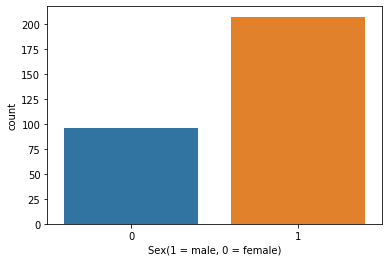

In [89]:
graph = sns.countplot(x = 'sex', data = df)
graph.set(xlabel = 'Sex(1 = male, 0 = female)')
print(graph)

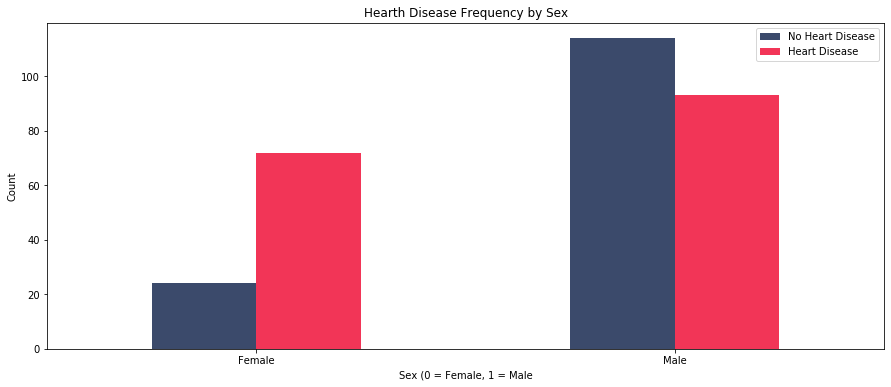

In [99]:
pd.crosstab(df.sex, df.target).plot(kind = 'bar', figsize = (15,6), color = ['#3b4a6b', '#f23557'])
plt.title('Hearth Disease Frequency by Sex')
plt.xlabel('Sex')
plt.xticks(np.arange(2), ['Female', 'Male'])
plt.xticks(rotation = 0)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Count')
plt.show()

In [91]:
# graph = sns.catplot(x = 'sex', col = 'target', data = df, kind = 'count',height = 4, aspect = .7)
# graph = graph.set(title = 'Heart Disease Freqency by Sex')
# print(graph)

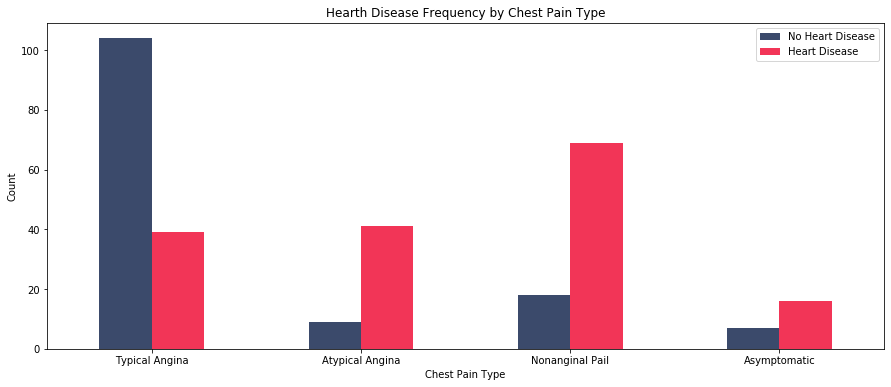

In [98]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (15,6), color = ['#3b4a6b', '#f23557'])
plt.title('Hearth Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ['Typical Angina', 'Atypical Angina', 'Nonanginal Pail', 'Asymptomatic'])
plt.xticks(rotation = 0)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Count')
plt.show()

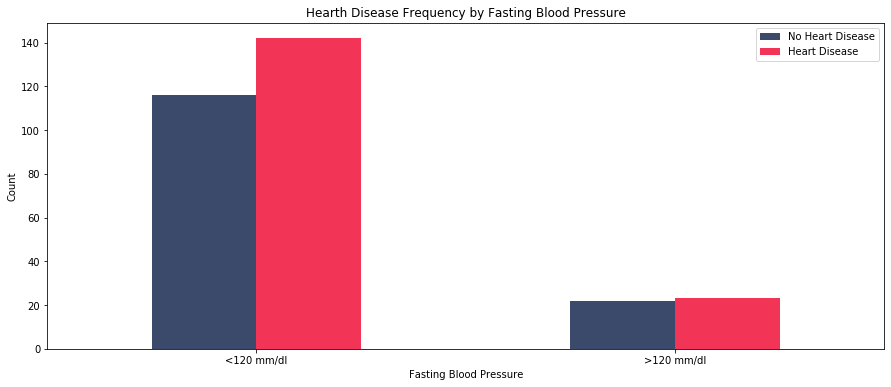

In [105]:
pd.crosstab(df.fbs, df.target).plot(kind = 'bar', figsize = (15,6), color = ['#3b4a6b', '#f23557'])
plt.title('Hearth Disease Frequency by Fasting Blood Pressure')
plt.xlabel('Fasting Blood Pressure')
plt.xticks(np.arange(2), ['<120 mm/dl', '>120 mm/dl'])
plt.xticks(rotation = 0)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Count')
plt.show()

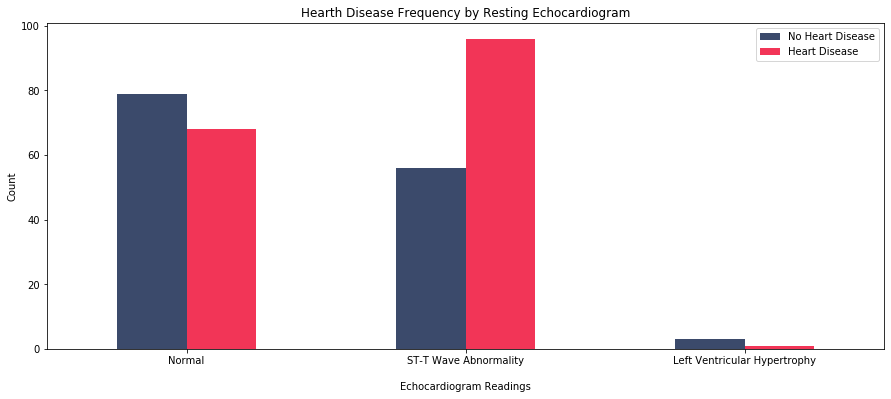

In [109]:
pd.crosstab(df.restecg, df.target).plot(kind = 'bar', figsize = (15,6), color = ['#3b4a6b', '#f23557'])
plt.title('Hearth Disease Frequency by Resting Echocardiogram')
plt.xlabel('\nEchocardiogram Readings')
plt.xticks(np.arange(3), ['Normal', 'ST-T Wave Abnormality', 'Left Ventricular Hypertrophy'])
plt.xticks(rotation = 0)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Count')
plt.show()

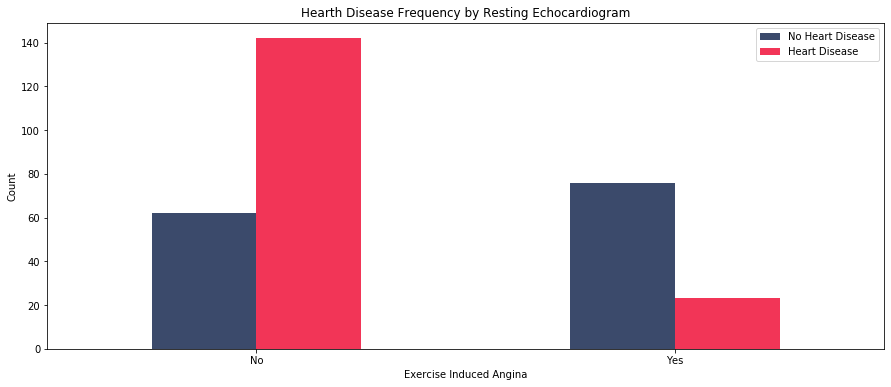

In [112]:
pd.crosstab(df.exang, df.target).plot(kind = 'bar', figsize = (15,6), color = ['#3b4a6b', '#f23557'])
plt.title('Hearth Disease Frequency by Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.xticks(rotation = 0)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Count')
plt.show()

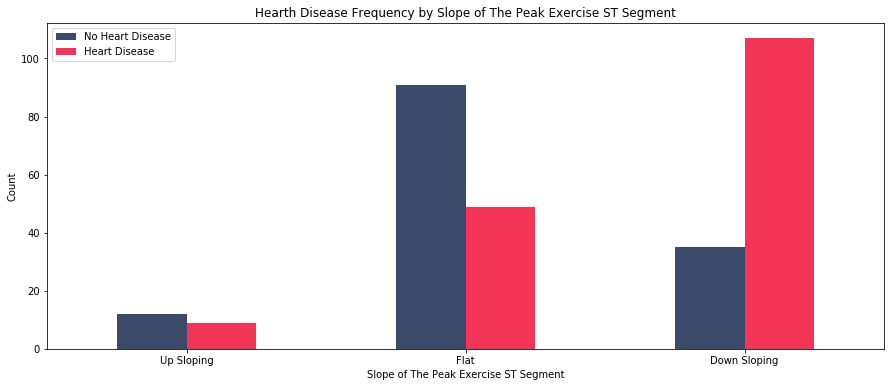

In [115]:
pd.crosstab(df.slope, df.target).plot(kind = 'bar', figsize = (15,6), color = ['#3b4a6b', '#f23557'])
plt.title('Hearth Disease Frequency by Slope of The Peak Exercise ST Segment')
plt.xlabel('Slope of The Peak Exercise ST Segment')
plt.xticks(np.arange(3), ['Up Sloping', 'Flat', 'Down Sloping'])
plt.xticks(rotation = 0)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Count')
plt.show()

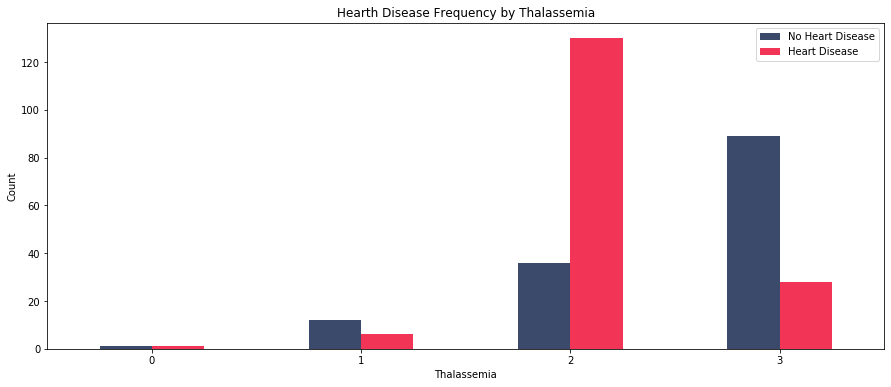

In [135]:
pd.crosstab(df.thal, df.target).plot(kind = 'bar', figsize = (15,6), color = ['#3b4a6b', '#f23557'])
plt.title('Hearth Disease Frequency by Thalassemia')
plt.xlabel('Thalassemia')
#plt.xticks(np.arange(3), ['Up Sloping', 'Flat', 'Down Sloping'])
plt.xticks(rotation = 0)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Count')
plt.show()

[Text(0, 0.5, 'Frequencey'),
 Text(0.5, 0, 'age'),
 Text(0.5, 1.0, 'Age of Patients')]

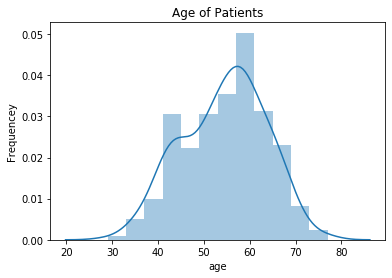

In [152]:
graph = sns.distplot(df.age)
graph.set(xlabel = 'age', ylabel = 'Frequencey', title = 'Age of Patients')


[Text(0, 0.5, 'Frequencey'),
 Text(0.5, 0, 'Resting Blood Pressure(mg/dl)'),
 Text(0.5, 1.0, "Patient's Resting Blood Pressure")]

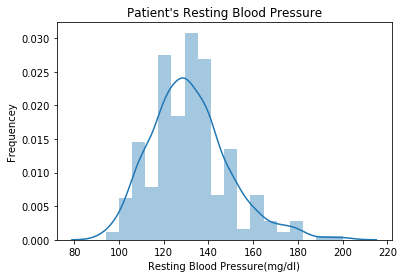

In [153]:
graph = sns.distplot(df.trestbps)
graph.set(xlabel = 'Resting Blood Pressure(mg/dl)', ylabel = 'Frequencey', title = 'Resting Blood Pressure')


[Text(0, 0.5, 'Frequencey'),
 Text(0.5, 0, 'Cholesterol(mg/dl)'),
 Text(0.5, 1.0, "Patient's Cholesterol")]

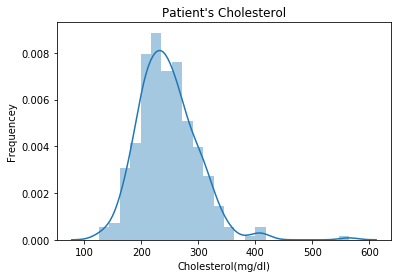

In [154]:
graph = sns.distplot(df.chol)
graph.set(xlabel = 'Cholesterol(mg/dl)', ylabel = 'Frequencey', title = 'Patient\'s Cholesterol')

[Text(0, 0.5, 'Frequencey'),
 Text(0.5, 0, 'Maximum Heatrate(bpm)'),
 Text(0.5, 1.0, "Patient's Heartrate")]

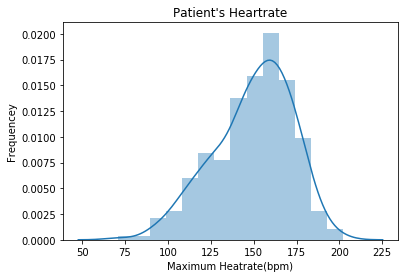

In [159]:
graph = sns.distplot(df.thalach)
graph.set(xlabel = 'Maximum Heatrate(bpm)', ylabel = 'Frequencey', title = 'Patient\'s Heartrate')

[Text(0, 0.5, 'Frequencey'),
 Text(0.5, 0, 'ST Depression'),
 Text(0.5, 1.0, "Patient's ST Depression induced by Exercise")]

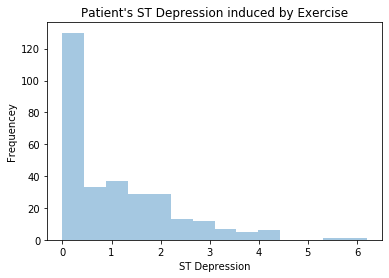

In [167]:
graph = sns.distplot(df.oldpeak, kde = False)
graph.set(xlabel = 'ST Depression', ylabel = 'Frequencey', title = 'Patient\'s ST Depression induced by Exercise')

[Text(0, 0.5, 'Frequencey'),
 Text(0.5, 0, 'Major Vessels'),
 Text(0.5, 1.0, "Patient's number of Major Vessels")]

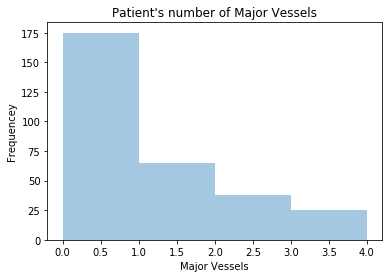

In [168]:
graph = sns.distplot(df.ca, bins = 4, kde = False)
graph.set(xlabel = 'Major Vessels', ylabel = 'Frequencey', title = 'Patient\'s number of Major Vessels')